# Свёрточные операции
(cv_filters)=

[Свёрточные операции](https://en.wikipedia.org/wiki/Kernel_(image_processing)) позволяют делать много полезных преобразований над изображениями.

In [14]:
import os

import numpy as np
from matplotlib import pyplot as plt
import cv2

image_folder = os.path.join("..", "..", "_static", "lecture_specific", "cv")

def show_image(ax, image, title=None, cmap=None):
    """
    Вывести изображение в указанных осях.
    """
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

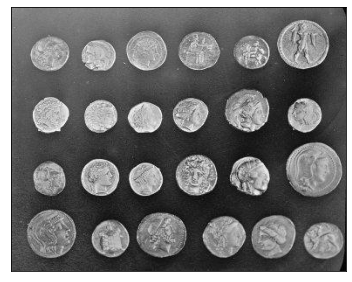

In [15]:
path = os.path.join(image_folder, "coins.jpg")

image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(5, 5), layout="tight")
show_image(ax, image, cmap="gray")

## Размытие

Например, сделав свертку изображения с ядром

$$
\dfrac{1}{nm}
\underbrace{
\begin{pmatrix}
1 & \cdots\ & 1\\
\vdots & \ddots &\vdots\\
1 & \cdots\ & 1
\end{pmatrix}}_{m}
\left.\vphantom{\begin{pmatrix}
1 & \cdots\ & 1\\
\vdots & \ddots &\vdots\\
1 & \cdots\ & 1
\end{pmatrix}}\right\}n.
$$

мы получим размытие.

Ниже приводится результат размытия при $n$ и $m$ равным 5 пикселям.

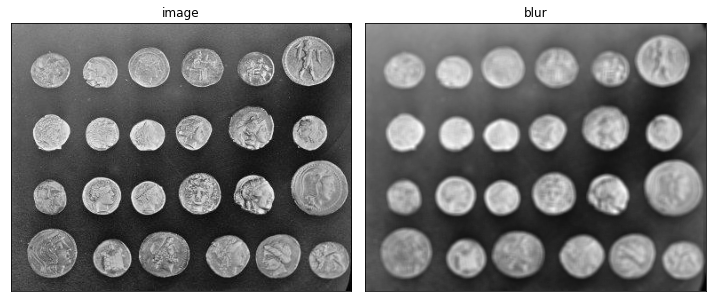

In [4]:
blurred_5 = cv2.blur(image, (5, 5))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], image, title="image", cmap="gray")
show_image(axs[1], blurred_5, title="blur", cmap="gray")

Чем больше ядро, тем сильнее размытие.

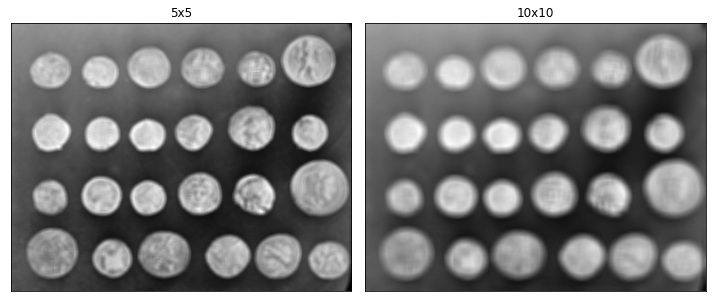

In [7]:
blurred_10 = cv2.blur(image, (10, 10))

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], blurred_5, title="5x5", cmap="gray")
show_image(axs[1], blurred_10, title="10x10", cmap="gray")

Чаще для размытия применяют [ядро Гаусса](https://en.wikipedia.org/wiki/Gaussian_blur), которое имеет колоколообразную форму

$$
\alpha e ^ \tfrac{(-i - (ksize-1)/2)^2}{2\sigma ^ 2}.
$$

Чем больше дисперсия $\sigma$, тем сильнее размытие.

Получить одномерное ядро Гаусса можно методом [cv2.getGaussianKernel](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa). Двумерное ядро можно получить внешним произведением одномерных из-за свойств свертки. Отобразим как выглядят ядра Гаусса при разных значениях дисперсии $\sigma$.

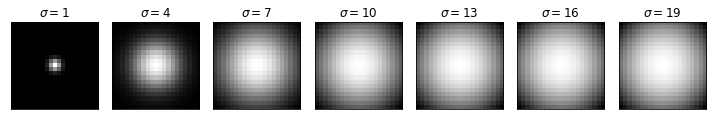

In [26]:
kernels = [cv2.getGaussianKernel(21, i, cv2.CV_32F) for i in range(1, 21, 3)]
kernels2D = [np.outer(kernel, kernel) for kernel in kernels]

fig, axs = plt.subplots(figsize=(10, 5), ncols=len(kernels2D), layout="tight")

for i, kernel in enumerate(kernels2D):
    show_image(axs[i], kernel, title=f"$\sigma={1 + 3*i}$", cmap="gray")

Нет необходимости в явном виде создавать ядро Гаусса, чтобы применить размытие. Достаточно применить функцию [cv2.GaussianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1).

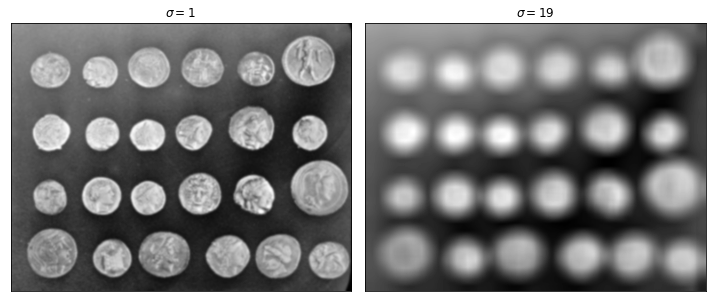

In [27]:
gauss_blurred_1 = cv2.GaussianBlur(image, (21, 21), 1)
gauss_blurred_19 = cv2.GaussianBlur(image, (21, 21), 19)


fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], gauss_blurred_1, title="$\sigma=1$", cmap="gray")
show_image(axs[1], gauss_blurred_19, title="$\sigma=19$", cmap="gray")

Размытие Гаусса часто применяют для подавления шумов.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


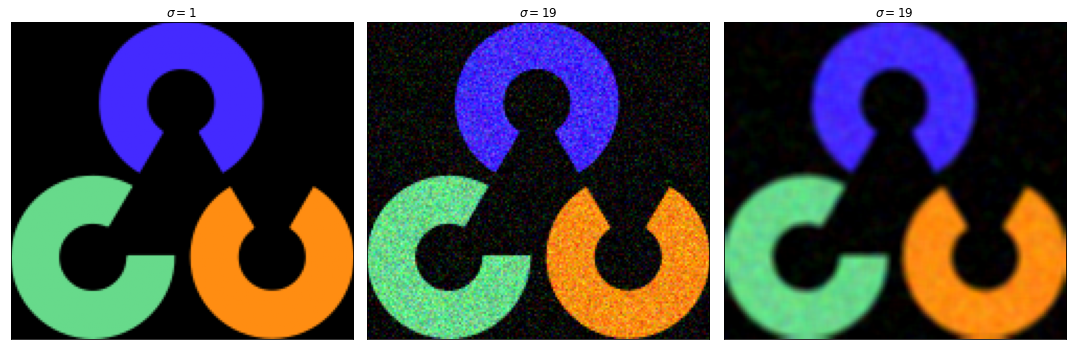

In [67]:
path = os.path.join(image_folder, "OpenCV.png")
openCV = cv2.imread(path) / 255.
noised = openCV + np.random.normal(0, 0.1, size= openCV.shape)
blurred = cv2.GaussianBlur(noised, (5, 5), 2)

fig, axs = plt.subplots(figsize=(15, 5), ncols=3, layout="tight")
show_image(axs[0], openCV, title="$\sigma=1$", cmap="gray")
show_image(axs[1], noised, title="$\sigma=19$", cmap="gray")
show_image(axs[2], blurred, title="$\sigma=19$", cmap="gray")

## Повышение резкости

Ядро 

$$
\begin{pmatrix}
-1 & -1 & -1 \\
-1 &  9 & -1 \\
-1 & -1 & -1
\end{pmatrix}
$$

может быть использовано для повышение резкости изображения. 

Метод [cv2.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) позволяет применять произвольный фильтр к изображению.

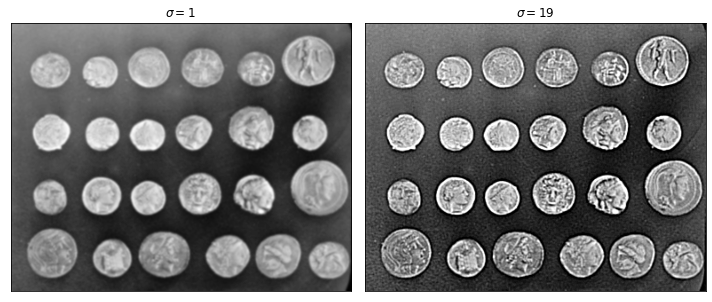

In [28]:
kernel = np.array([
    [-1,-1,-1], 
    [-1, 9,-1], 
    [-1,-1,-1]
])
sharpened_image = cv2.filter2D(gauss_blurred_1, -1, kernel)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], gauss_blurred_1, title="$\sigma=1$", cmap="gray")
show_image(axs[1], sharpened_image, title="$\sigma=19$", cmap="gray")

## Взятие производной


[Соболевское ядро](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) аппроксимирует операцию взятия производной. Так, например, фильтр 

$$
\begin{pmatrix}
-1 & -2 & -1\\
0 & 0 & 0 \\
1 & 2 & 1
\end{pmatrix}
$$

соответствует взятию производной по вертикальному направлению. Его транспонирование берет численную производную по горизонтальному направлению.

Рассмотрим задачу поиска контуров объекта на изображении. Т.к. внутри контура и снаружи него располагаются разные цвета (цвет объекта и цвет фона), то в перпендикулярном к контуру направлении  наблюдается резкий перепад яркостей, а значит и большое значение производной. Таким образом горизонтальная производная позволяет искать вертикальные контуры, а вертикальная --- горизонтальные. 

За применение фильтра Собеля в `openCV` отвечает метод [cv2.Sobel](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d).

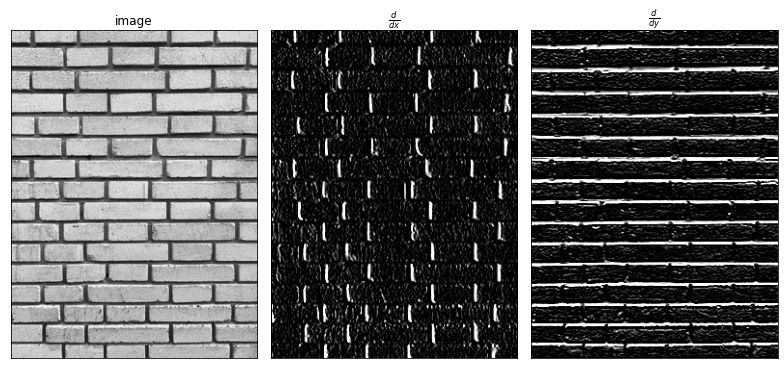

In [42]:
path = os.path.join(image_folder, "brickwall.jpg")
brickwall = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

dimage_dx = cv2.Sobel(brickwall, ddepth=-1, dx=1, dy=0, ksize=3)
dimage_dy = cv2.Sobel(brickwall, ddepth=-1, dx=0, dy=1, ksize=3)

fig, axs = plt.subplots(figsize=(11, 5), ncols=3, layout="tight")
show_image(axs[0], brickwall, title="image", cmap="gray")
show_image(axs[1], dimage_dx, title=r"$\frac{d}{dx}$", cmap="gray")
show_image(axs[2], dimage_dy, title=r"$\frac{d}{dy}$", cmap="gray")

Редко бывает так, что все контуры вертикальны и горизонтальны. Чтобы искать контуры с произвольным наклоном, можно взять сумму квадратов горизонтальной и вертикальной производных, что соответствует квадрату нормы градиента изображения. 

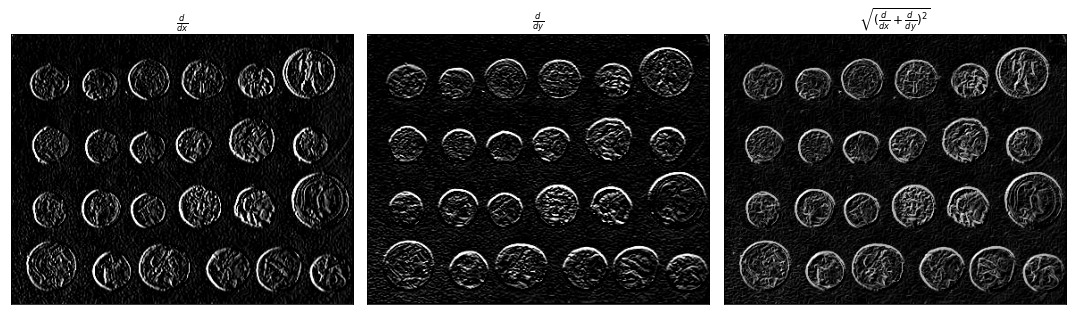

In [43]:
dimage_dx = cv2.Sobel(image, ddepth=-1, dx=1, dy=0, ksize=3)
dimage_dy = cv2.Sobel(image, ddepth=-1, dx=0, dy=1, ksize=3)
norm = np.sqrt(((dimage_dx/255.)**2 + (dimage_dy/255.)**2))

fig, axs = plt.subplots(figsize=(15, 5), ncols=3, layout="tight")
show_image(axs[0], dimage_dx, title=r"$\frac{d}{dx}$", cmap="gray")
show_image(axs[1], dimage_dy, title=r"$\frac{d}{dy}$", cmap="gray")
show_image(axs[2], norm, title=r"$\sqrt{(\frac{d}{dx} + \frac{d}{dy})^2}$", cmap="gray")

Т.к. взятие производной --- операция очень чувствительная к шуму, то обычно изображение предварительно сглаживают размытием Гаусса, а затем только берут производную. 

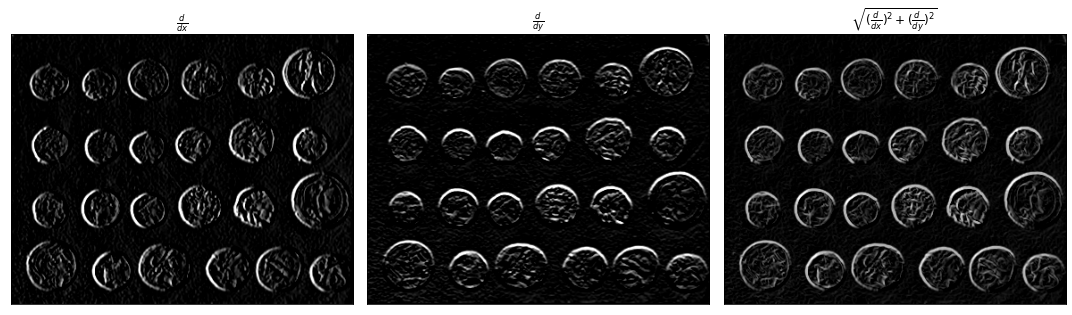

In [44]:
blurred = cv2.GaussianBlur(image, (3, 3), 0)
dimage_dx = cv2.Sobel(blurred, ddepth=-1, dx=1, dy=0, ksize=3)
dimage_dy = cv2.Sobel(blurred, ddepth=-1, dx=0, dy=1, ksize=3)
norm = np.sqrt(((dimage_dx/255.)**2 + (dimage_dy/255.)**2))

fig, axs = plt.subplots(figsize=(15, 5), ncols=3, layout="tight")
show_image(axs[0], dimage_dx, title=r"$\frac{d}{dx}$", cmap="gray")
show_image(axs[1], dimage_dy, title=r"$\frac{d}{dy}$", cmap="gray")
show_image(axs[2], norm, title=r"$\sqrt{(\frac{d}{dx})^2 + (\frac{d}{dy})^2}$", cmap="gray")

Фильтр Лапласа 

$$
\begin{pmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{pmatrix}
$$

соответствует второй производной, что в каком-то смысле облегчает поиск контура: в случае первой производной необходимо искать и минимумы и максимумы, в случае второй производной только нули. Метод [cv2.Laplacian](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6) позволяет применить этот фильтр к изображению. 

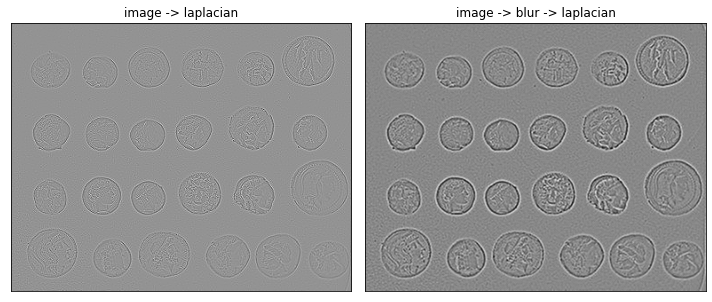

In [47]:
laplacian = cv2.Laplacian(image, 5)
blurred_laplacian = cv2.Laplacian(blurred, 5)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], laplacian, title="image -> laplacian", cmap="gray")
show_image(axs[1], blurred_laplacian, title="image -> blur -> laplacian", cmap="gray")

## Контуры

Нелинейный [cv2.Canny](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) предназначен специально для поиска контуров.

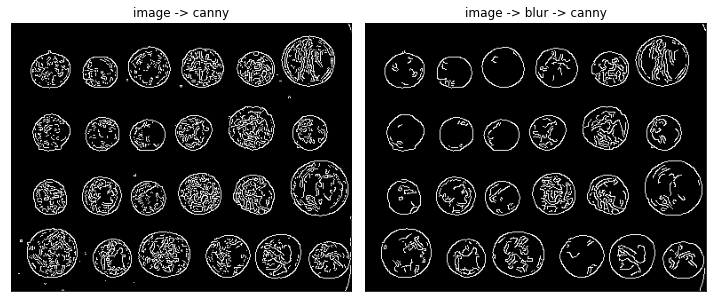

In [46]:
canny = cv2.Canny(image, 130, 180)
blured = cv2.GaussianBlur(image, (3, 3), 0)
blurred_canny = cv2.Canny(blured, 100, 180)

fig, axs = plt.subplots(figsize=(10, 5), ncols=2, layout="tight")
show_image(axs[0], canny, title="image -> canny", cmap="gray")
show_image(axs[1], blurred_canny, title="image -> blur -> canny", cmap="gray")